Overview:

This report presents investigation of baseball data. It is a data set containing complete batting and pitching statistics from 1871 to 2016, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. This project focuses on the unique salary structure of baseball. Following questions are explored: 1) Determing the salary structure of baseball, what factors drive a players salary. 2) Determining a relationship between player’s performance and salary. 3) What are the characteristics of some fo the highest earning pitchers and batters.

To take into consideration inflation, data of last 10 years is used for the calculations. Baseball has three player positions, of batter, pitcher and fielder. Here only batter and pitcher positions will be considered. Performance metrics used for batters are hits, home runs, batting average and runs batted in, and the performance metrics used for pitchers are earned runs average per 9 innings, striker outs, wins credited to the pitcher and loses credited to a pitcher.



The tables used for this report are: Master, Batting, Pitching, Salaries.

In [7]:
# importing libraries needed for the code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix
import scipy as sp


#reading the data files using pandas csv reader
master = pd.read_csv('D:/Maitrayee/1DataScience/Udacity/P2/master.csv')
batting = pd.read_csv('D:/Maitrayee/1DataScience/Udacity/P2/batting.csv')
pitching = pd.read_csv('D:/Maitrayee/1DataScience/Udacity/P2/pitching.csv')
salaries = pd.read_csv('D:/Maitrayee/1DataScience/Udacity/P2/salaries.csv')

Data Wrangling:



The code below performs data wrangling. First, data from only the columns of interest is pulled from the main tables into new data frames called batting_df, pitching_df and salaries_df. The batting average for batters and earned runs average for pitchers is then calculated and added in new column in batting_df and pitching_df respectively. The data from salaries_df table is merged into the batting_df and pitching_df to get the players salary for each year.



Then data is cleaned to element all the NAN and missing values.

In [8]:
years =  pd.Series(range(2006,2017)) #considering analysis for last 10 years

# selecting only the columns required for batters metrics
colsB = ['playerID','yearID','teamID','lgID','G','R','H','HR','AB','RBI'] 

# selecting only the columns required for pitchers metrics
colsP = ['playerID','yearID','teamID','lgID','G','IPouts','ER','W','L','SO']

# buliding batters data frame
batting_df = pd.DataFrame(batting.loc[batting['yearID'].isin(years)], columns=colsB)
batting_df.loc[:,'BA'] = batting_df['H']/batting_df['AB']

# bulinding pithcers data frame
pitching_df = pd.DataFrame(pitching.loc[pitching['yearID'].isin(years)], columns=colsP)
pitching_df.loc[:,'ERA'] = (pitching_df['ER']/pitching_df['IPouts'])*9

# bulinding pithcers data frame
salaries_df = pd.DataFrame(salaries.loc[salaries['yearID'].isin(years)])

# Merging batting and pitching data with the players salary data
batting_sal = pd.merge(batting_df, salaries_df, how='left', on=['yearID', 'playerID', 'teamID','lgID'])
pitching_sal = pd.merge(pitching_df, salaries_df, how='left', on=['yearID', 'playerID', 'teamID','lgID'])

# cleaning up data:- replacing NAN values
batting_sal['salary'].fillna(0, inplace=True)
batting_sal['BA'].fillna(0, inplace=True)

pitching_sal['salary'].fillna(0, inplace=True)
pitching_sal['ERA'].fillna(0, inplace=True)

Data Investigation:


To get the relation between each performance metric and salary, a correlation coefficient is calculated between each and plotted.

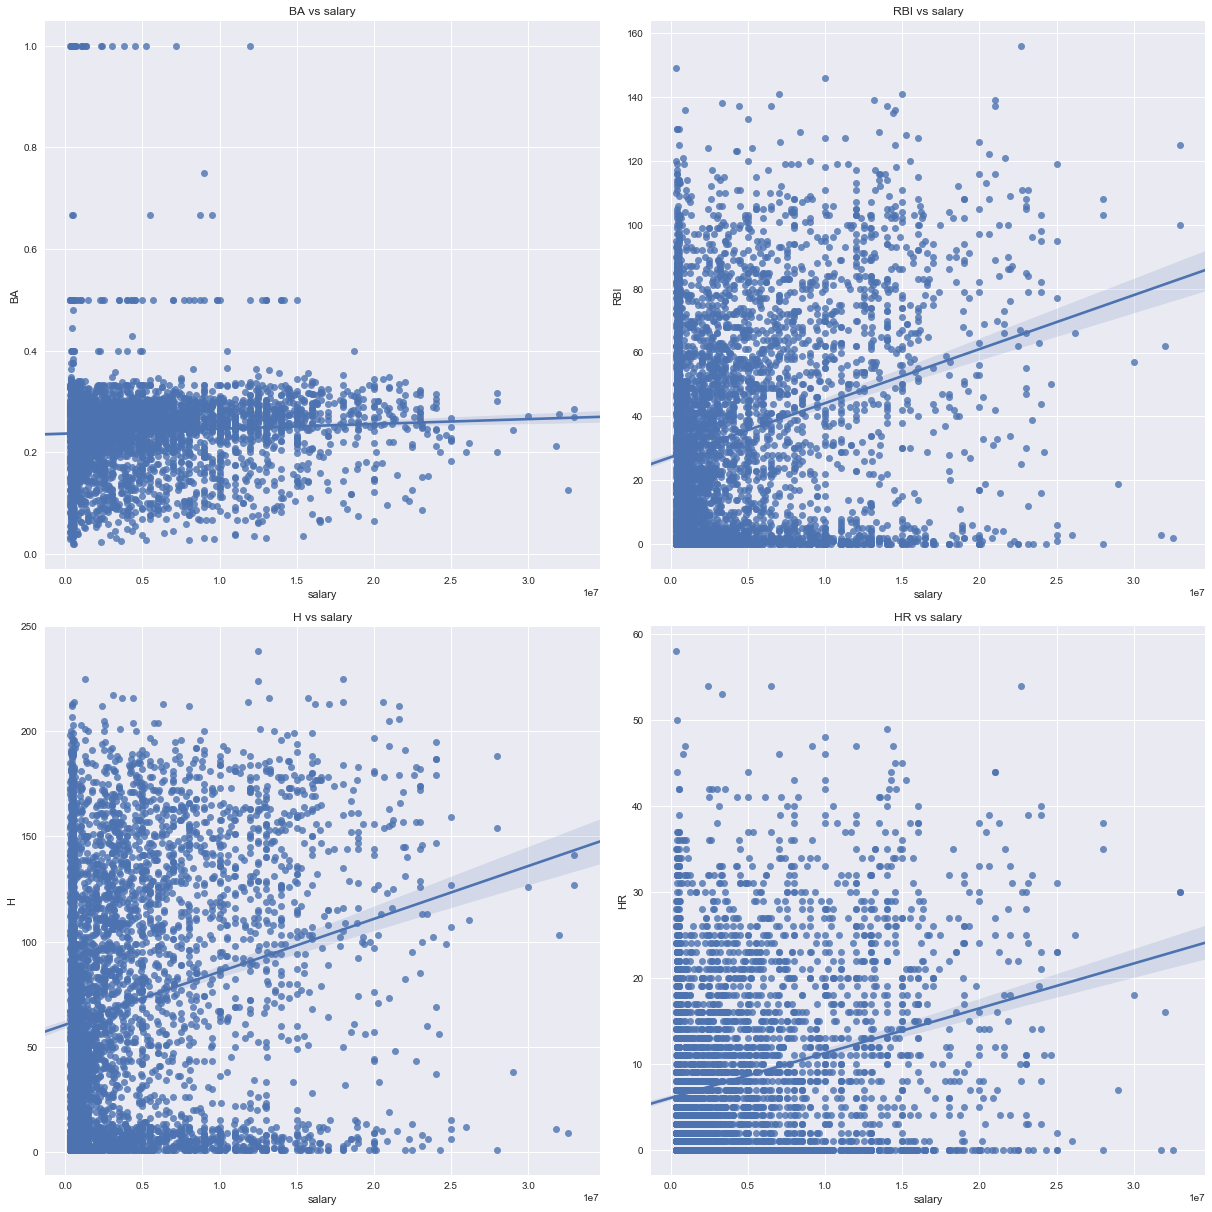

In [9]:
#shrinking data frame and choosing only players with grater than 0$ salary. 

colBC = ['H','HR','BA','RBI','salary']

batting_corr = pd.DataFrame(batting_sal.loc[(batting_sal['salary']!=0) & (batting_sal['BA']!=0)], columns=colBC)

fig = plt.figure(figsize=(17,17))
fig.add_subplot(221)
sns.regplot(x=batting_corr.salary, y=batting_corr.BA, fit_reg=True);
plt.xlabel('salary');
plt.ylabel('BA');
plt.title('BA vs salary');

fig.add_subplot(222)
sns.regplot(x=batting_corr.salary, y=batting_corr.RBI, fit_reg=True);
plt.xlabel('salary');
plt.ylabel('RBI');
plt.title('RBI vs salary');

fig.add_subplot(223)
sns.regplot(x=batting_corr.salary, y=batting_corr.H, fit_reg=True);
plt.xlabel('salary');
plt.ylabel('H');
plt.title('H vs salary');

fig.add_subplot(224)
sns.regplot(x=batting_corr.salary, y=batting_corr.HR, fit_reg=True);
plt.xlabel('salary');
plt.ylabel('HR');
plt.title('HR vs salary');

fig.tight_layout()
plt.show()

  


In [10]:
# Pearson correlation

r_value, p_value,= sp.stats.pearsonr(batting_corr["salary"],batting_corr["BA"])
print ('Correlation coefficient between salary and BA')
print (r_value)

r_value, p_value,= sp.stats.pearsonr(batting_corr["salary"],batting_corr["RBI"])
print ('Correlation coefficient between salary and RBI')
print (r_value)

r_value, p_value,= sp.stats.pearsonr(batting_corr["salary"],batting_corr["H"])
print ('Correlation coefficient between salary and H')
print (r_value)

r_value, p_value,= sp.stats.pearsonr(batting_corr["salary"],batting_corr["HR"])
print ('Correlation coefficient between salary and HR')
print (r_value)



Correlation coefficient between salary and BA
0.0542779308222
Correlation coefficient between salary and RBI
0.271844325895
Correlation coefficient between salary and H
0.216941618759
Correlation coefficient between salary and HR
0.276222981645


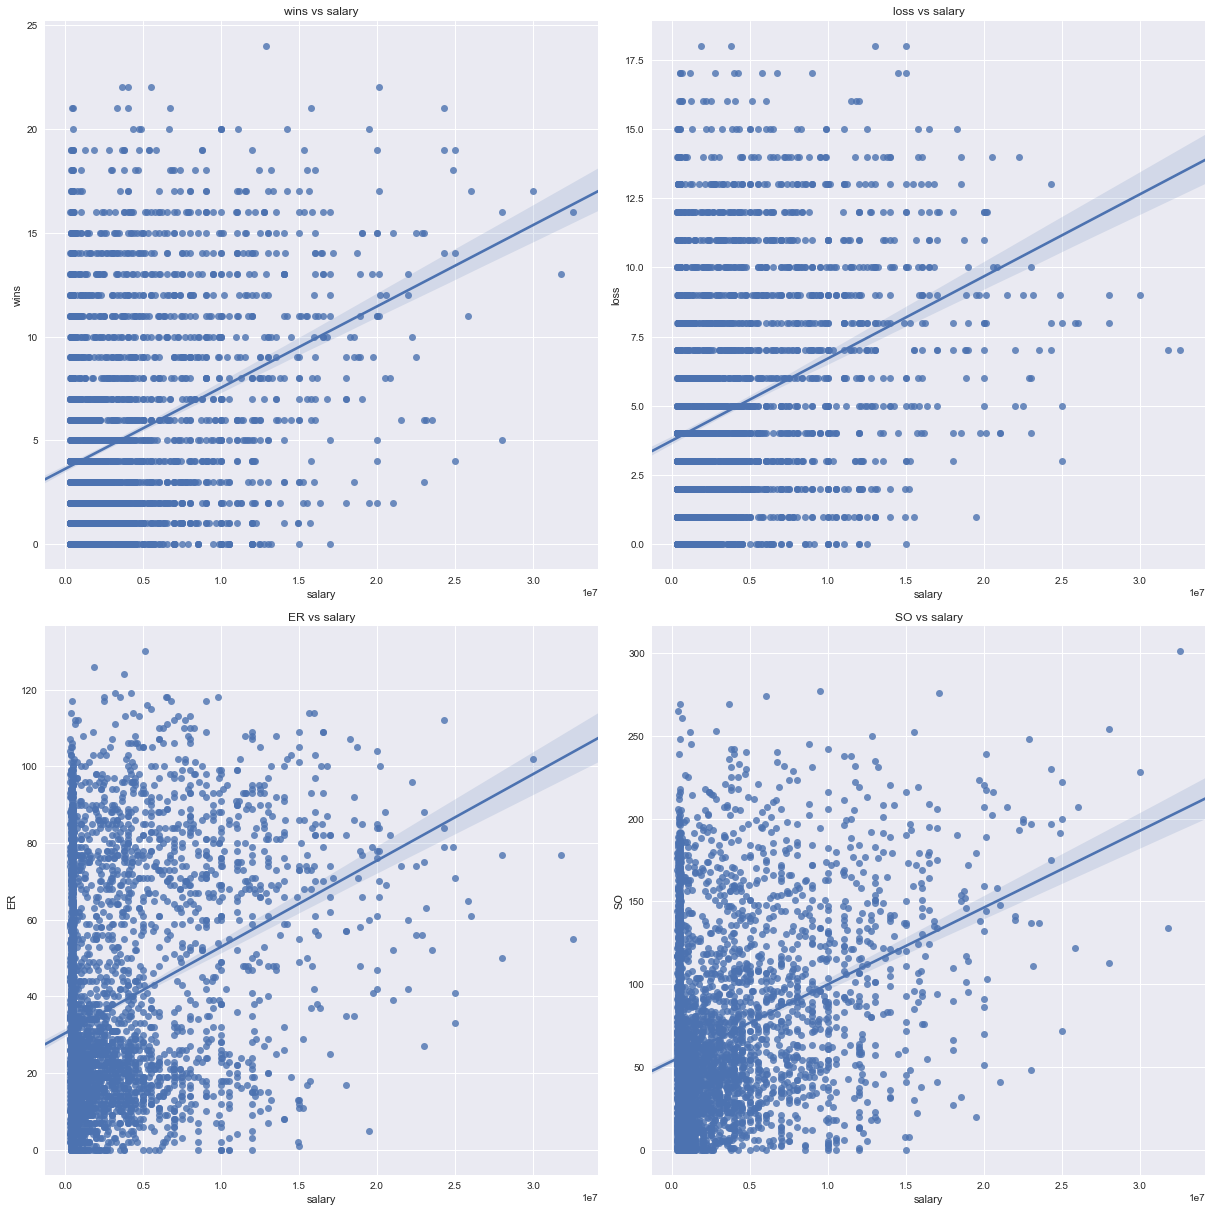

In [11]:
colPC = ['ER','W','L','SO','salary']

pitching_corr = pd.DataFrame(pitching_sal.loc[(pitching_sal['salary']!=0)], columns=colPC)

fig = plt.figure(figsize=(17,17))
fig.add_subplot(221)
sns.regplot(x=pitching_corr.salary, y=pitching_corr.W, fit_reg=True);
plt.xlabel('salary');
plt.ylabel('wins');
plt.title('wins vs salary');

fig.add_subplot(222)
sns.regplot(x=pitching_corr.salary, y=pitching_corr.L, fit_reg=True);
plt.xlabel('salary');
plt.ylabel('loss');
plt.title('loss vs salary');

fig.add_subplot(223)
sns.regplot(x=pitching_corr.salary, y=pitching_corr.ER, fit_reg=True);
plt.xlabel('salary');
plt.ylabel('ER');
plt.title('ER vs salary');

fig.add_subplot(224)
sns.regplot(x=pitching_corr.salary, y=pitching_corr.SO, fit_reg=True);
plt.xlabel('salary');
plt.ylabel('SO');
plt.title('SO vs salary');

fig.tight_layout()
plt.show()


In [12]:
# Pearson correlation

r_value, p_value,= sp.stats.pearsonr(pitching_corr["salary"],pitching_corr["ER"])
print ('Correlation coefficient between salary and ER')
print (r_value)

r_value, p_value,= sp.stats.pearsonr(pitching_corr["salary"],pitching_corr["SO"])
print ('Correlation coefficient between salary and SO')
print (r_value)

r_value, p_value,= sp.stats.pearsonr(pitching_corr["salary"],pitching_corr["W"])
print ('Correlation coefficient between salary and W')
print (r_value)

r_value, p_value,= sp.stats.pearsonr(pitching_corr["salary"],pitching_corr["L"])
print ('Correlation coefficient between salary and L')
print (r_value)

Correlation coefficient between salary and ER
0.325524735216
Correlation coefficient between salary and SO
0.358780936212
Correlation coefficient between salary and W
0.348848528612
Correlation coefficient between salary and L
0.315401785543


Observations:

Figure 1 shows the scatterplot plot overlayed linear regression line between batter performance metrics and salary. Batting svergae (BA), hits (H), home runs (HR) and runs batted in (RBI) are used as batter performance metrics. BA has the least correlation with the salary of the player while number of HR and RBI has the most correlation with the salary.

Figure 2 shows the scatterplot overlayed with linear regression line between pitcher performance metrics and salary. Earned runs (ER), strike outs (SO), wins (W) and losses (L) are used as the pitcher performace metrics. All four statistics shows a correlation with the salary but SO and W shows most correlation with their salary.

Conclusion:

Four performance metrics for each batter and pitcher were considered. The scatter plots and regression coefficients for each metric and salary was plotted. From the correlation coefficients, the important characteristics in a batter's performance are the number of home runs and runs batter in, while the important characteristics in a pitcher's performance are the number of strike outs and wins associated with the pitcher. 